# Housing Prices - Advanced Regression Techniques

Filename: housing-model.ipynb \
Author: Timothy Holland \
Last updated: 27/05/2024 \
Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## 1. Data Loading & Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_data = pd.read_csv('housing-prices-data/train.csv')
test_data = pd.read_csv('housing-prices-data/test.csv')

# Drop ID column from both
train_data = train_data.drop('Id', axis=1)
test_id = test_data['Id']
test_data = test_data.drop('Id', axis=1)

# Display first few rows
print(train_data.head())

# Summary of statistics
print(train_data.describe())

# Information in dataset
print(train_data.info())


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [3]:
# Display summary statistics for each feature
print(train_data.describe())

# Display the data types of each feature
print(train_data.info())

# Check for missing values in each feature
print(train_data.isnull().sum())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

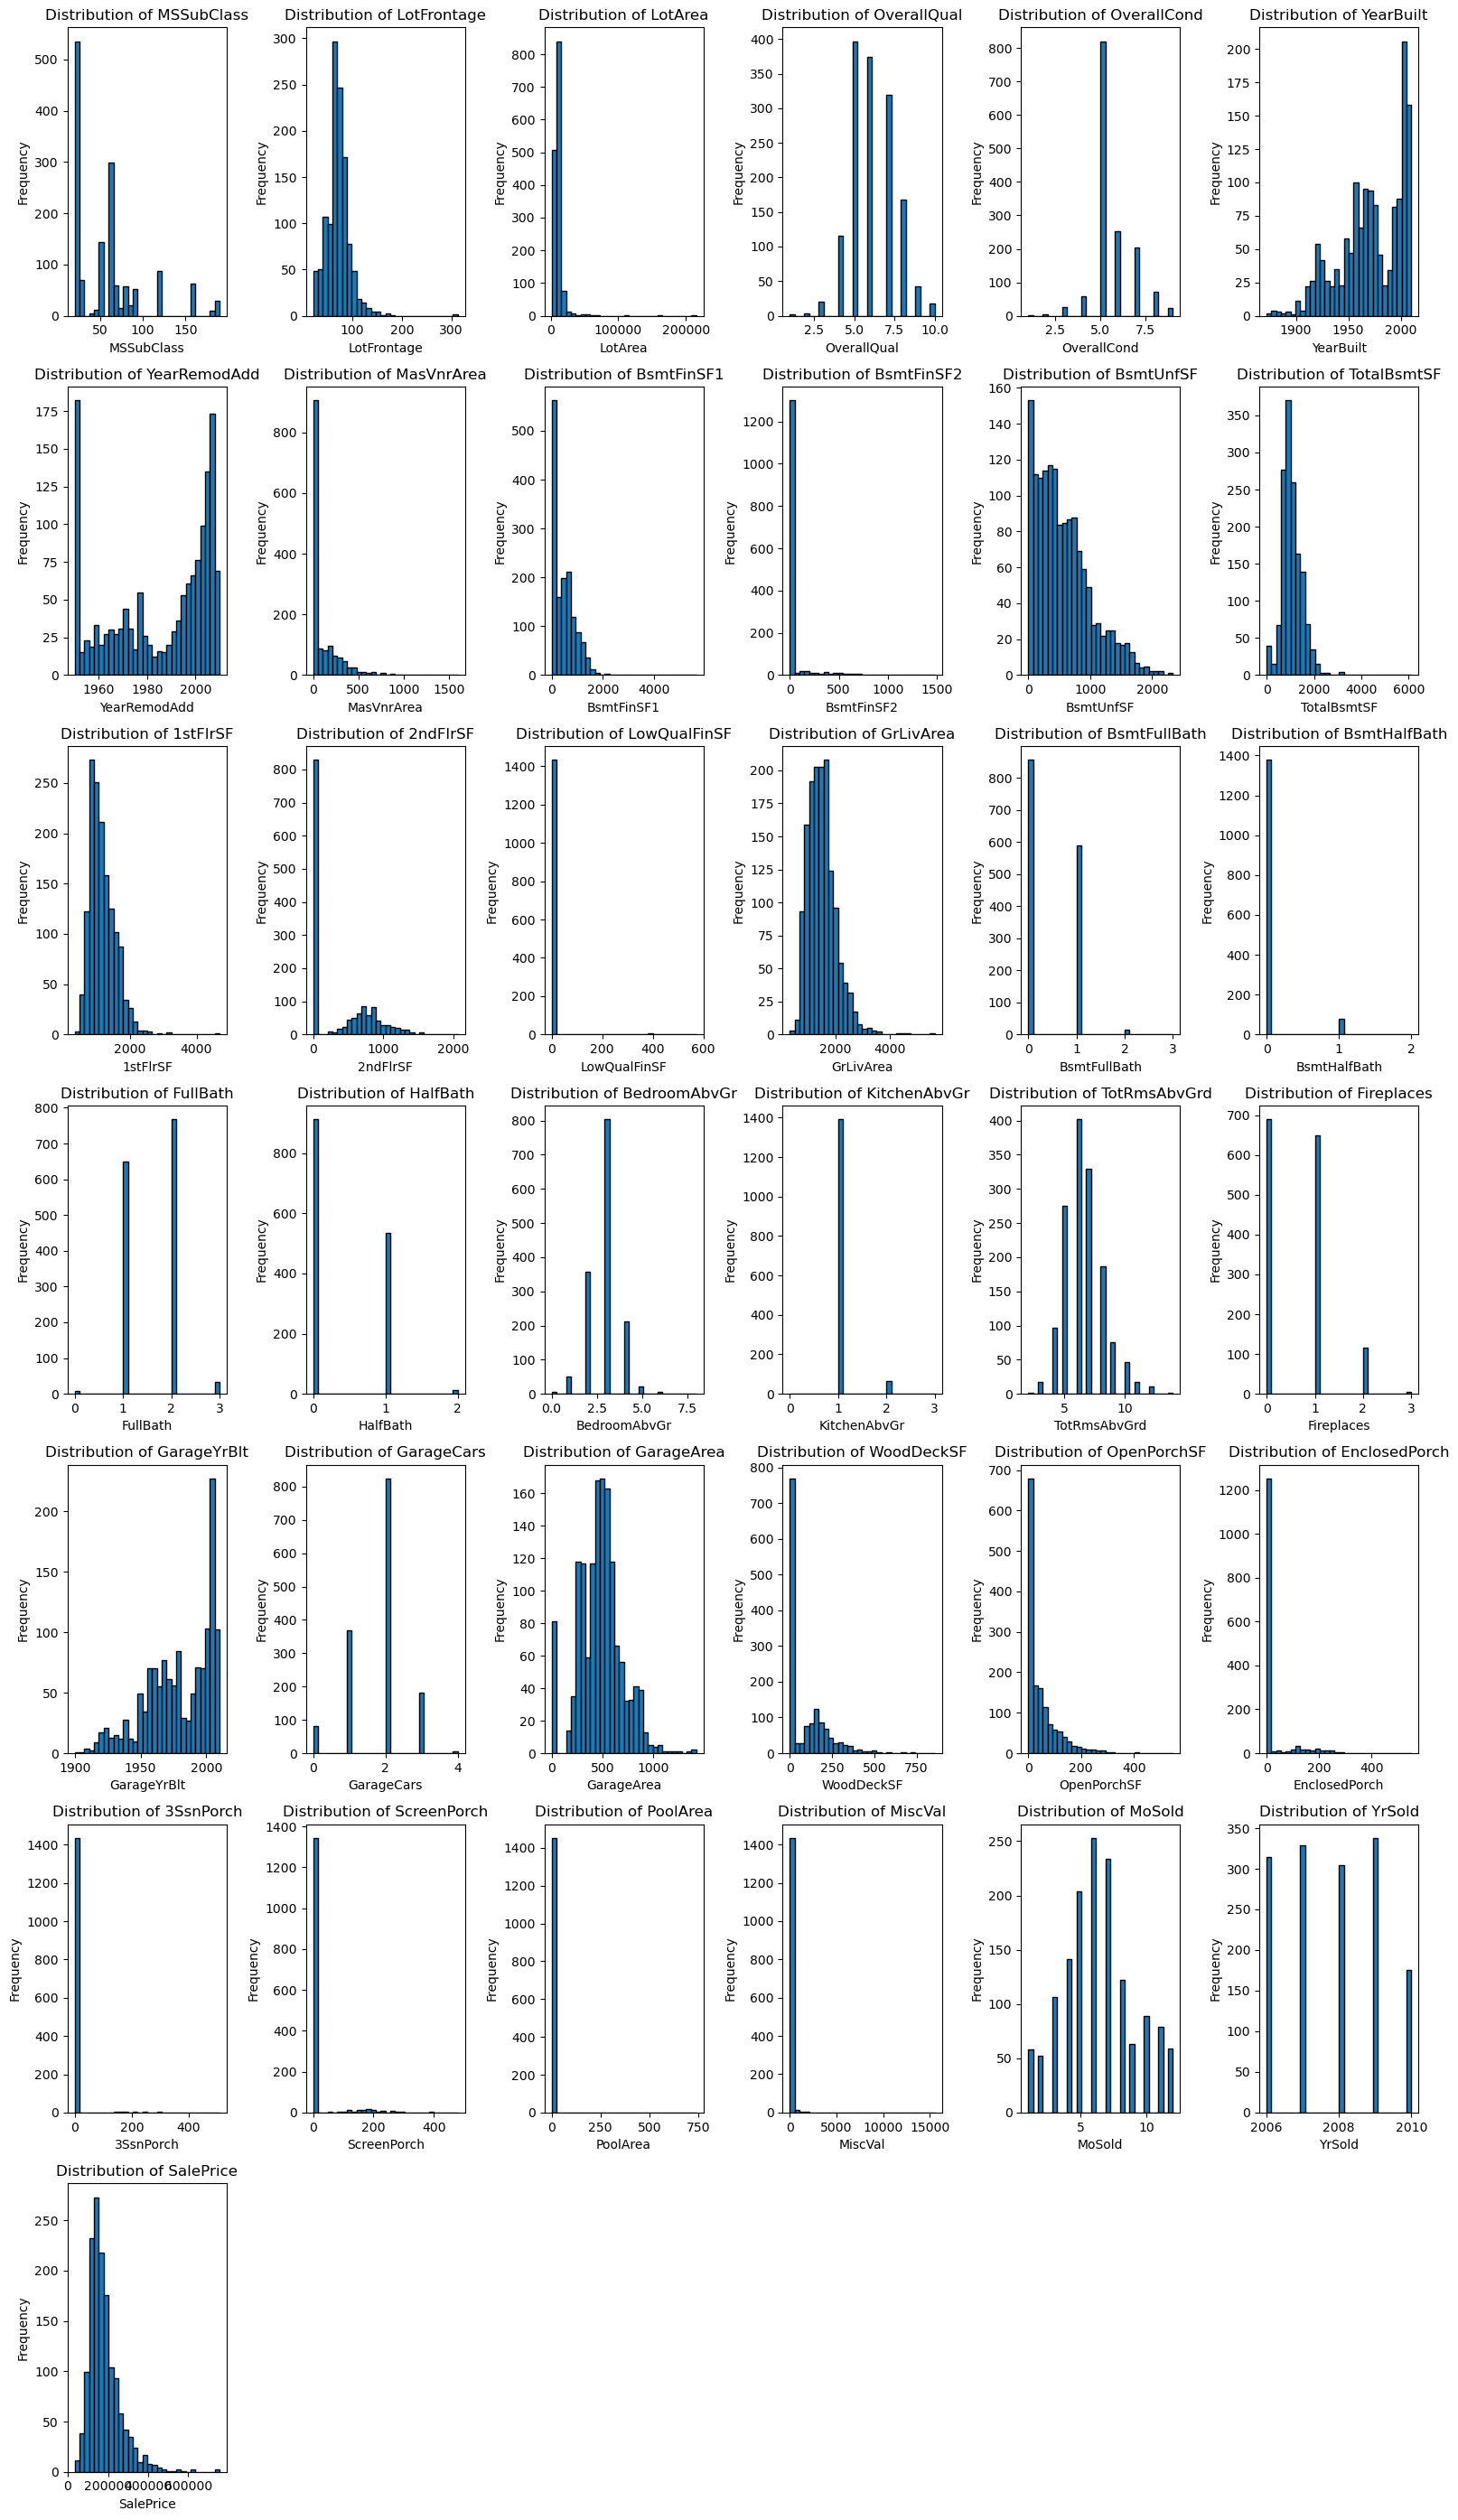

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Identify numeric features
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots for numeric features
num_features = len(numeric_features)
num_cols = 6
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(train_data[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

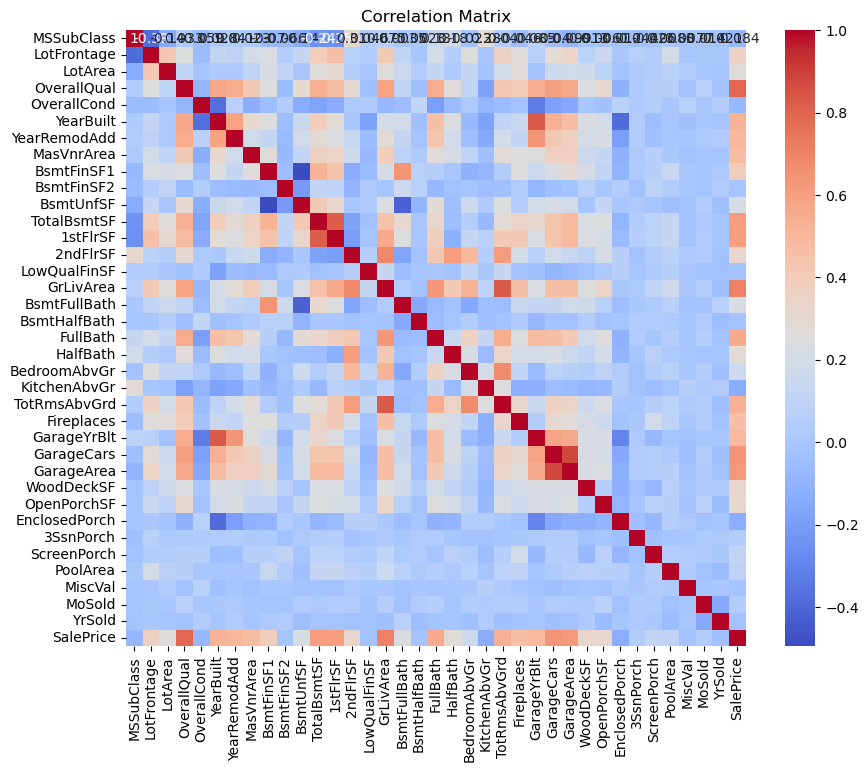

In [5]:
# Select only the numeric columns for correlation matrix
numeric_columns = train_data.select_dtypes(include=[float, int]).columns
numeric_data = train_data[numeric_columns]

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preprocessing

In [6]:
# Split data
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)

Features with missing values:
LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 59.73%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinType2: 2.60%
Electrical: 0.07%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


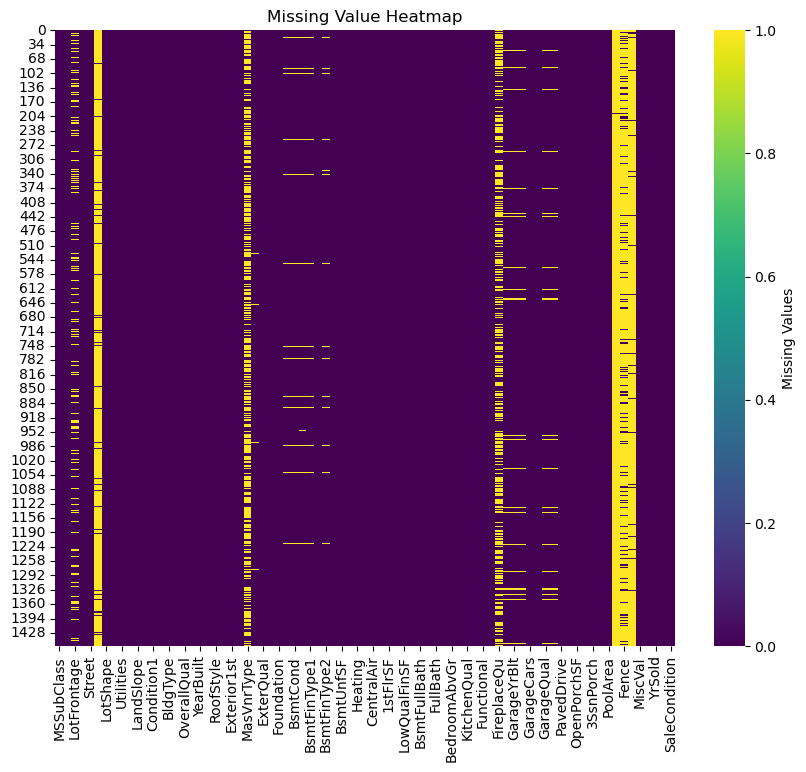

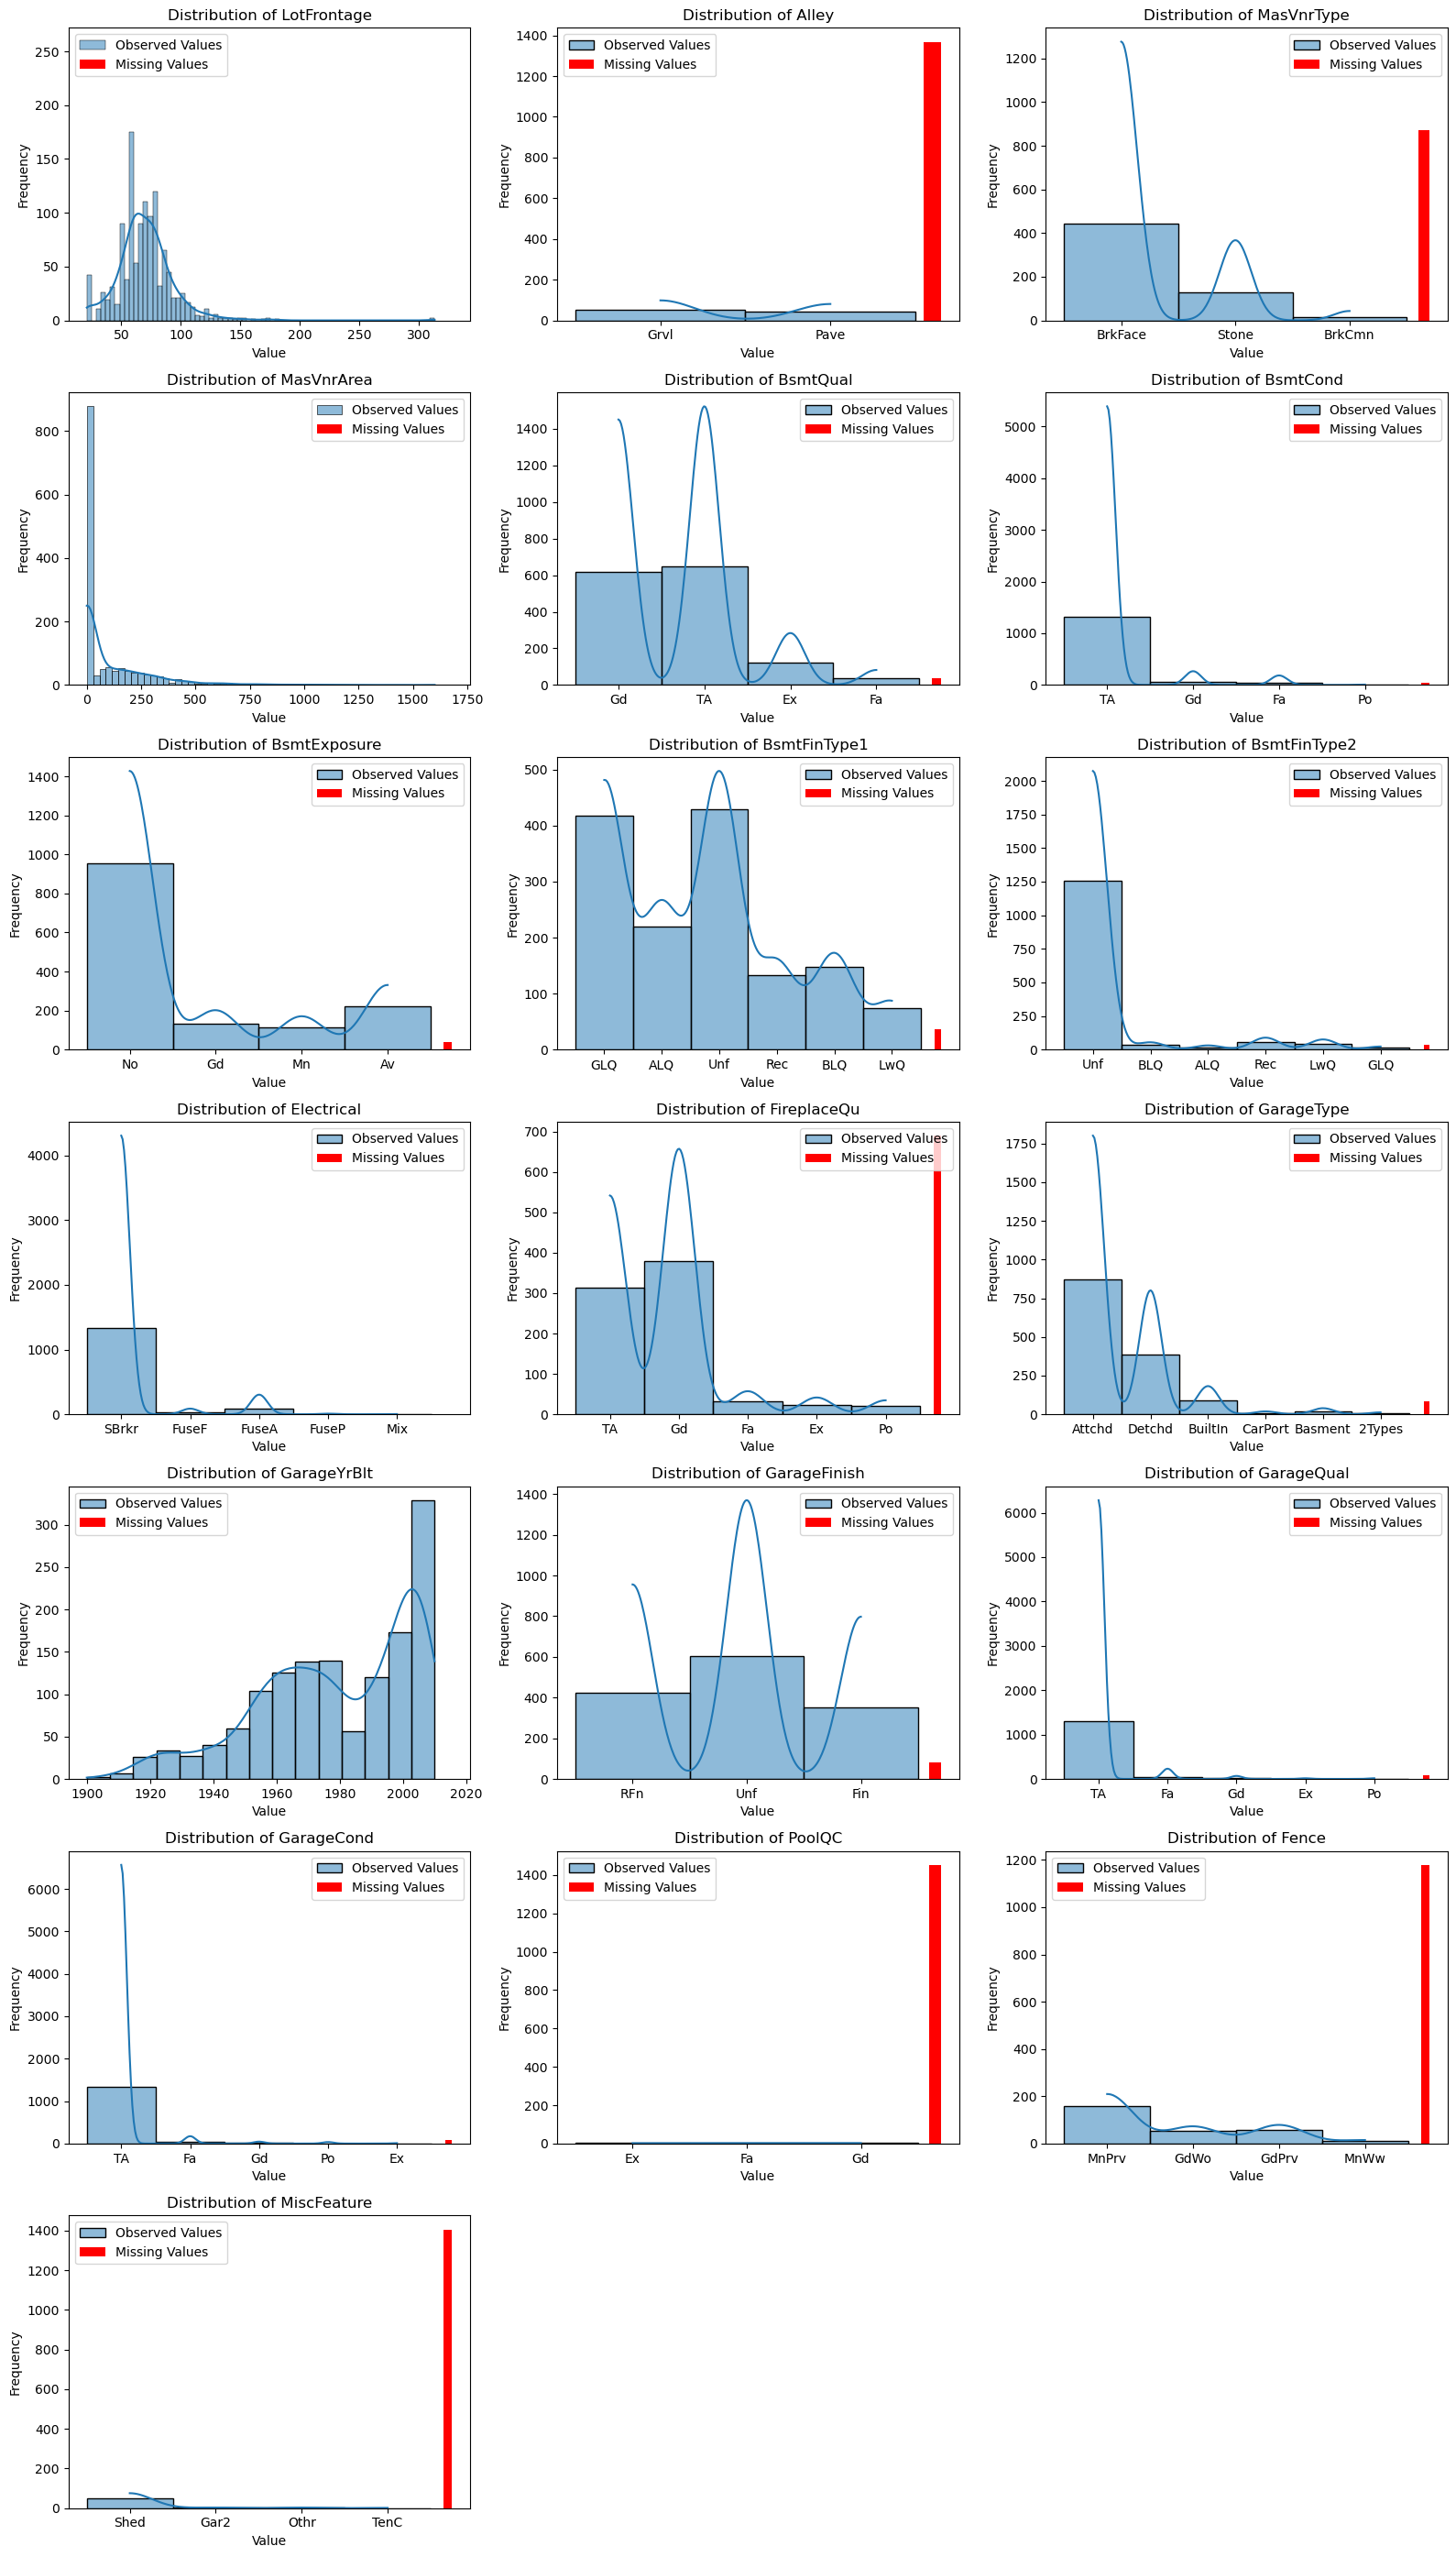

In [7]:
# Handle Missing Values

import pandas as pd
import math
import warnings

# Assuming your dataset is stored in a pandas DataFrame called 'X'

# Calculate the number of missing values in each feature
missing_values = X.isnull().sum()

# Calculate the total number of values in each feature
total_values = X.shape[0]

# Calculate the proportion of missing values in each feature
missing_proportions = missing_values / total_values

# Filter the features with missing values
features_with_missing = missing_proportions[missing_proportions > 0]

# Print the features with missing values and their proportions
print("Features with missing values:")
for feature, proportion in features_with_missing.items():
    print(f"{feature}: {proportion:.2%}")
    
# Create a heatmap to visualize the correlation between missing values across features
plt.figure(figsize=(10, 8))
sns.heatmap(X.isnull(), cmap='viridis', cbar_kws={'label': 'Missing Values'})
plt.title('Missing Value Heatmap')
plt.show()

# Distributions of features with missing data 

# Suppress the specific warning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version")

num_features = len(features_with_missing)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, feature in enumerate(features_with_missing.index):
    row = i // num_cols
    col = i % num_cols
    
    observed_values = X[feature].dropna()
    missing_values_count = X[feature].isnull().sum()
    
    sns.histplot(observed_values, kde=True, label='Observed Values', ax=axes[row, col])
    
    # Add a bar for missing values
    axes[row, col].bar(axes[row, col].get_xlim()[1], missing_values_count, width=0.1, color='red', label='Missing Values')
    
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

##### Masonry Veneer Features

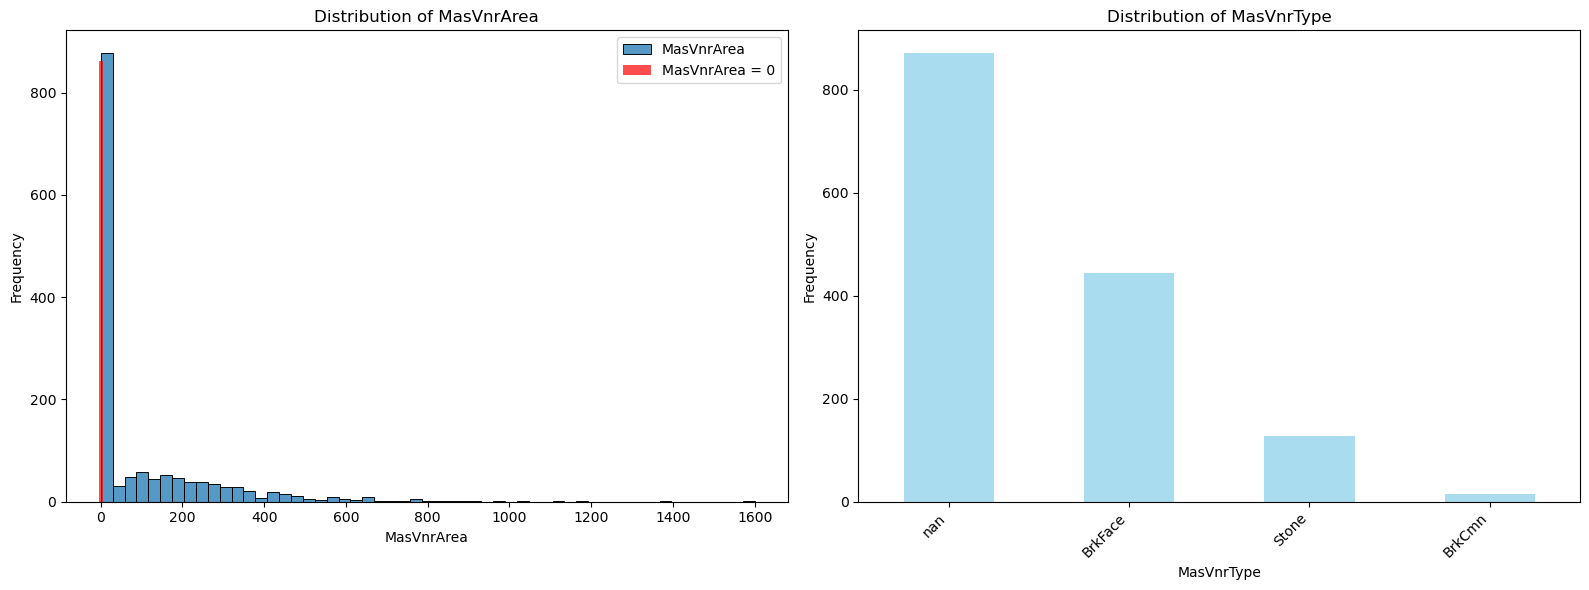

Number of instances with MasVnrArea being 0: 861
Number of instances with MasVnrArea being 0 and missing value in MasVnrType: 859


In [8]:
# Masonry veneer feature

import matplotlib.pyplot as plt

# Count the number of instances with MasVnrArea being 0
zero_masonry_count = (X['MasVnrArea'] == 0).sum()

# Count the number of instances with MasVnrArea being 0 and missing value in MasVnrType
zero_masonry_and_missing_type_count = ((X['MasVnrArea'] == 0) & (X['MasVnrType'].isnull())).sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of MasVnrArea
sns.histplot(X['MasVnrArea'], kde=False, label='MasVnrArea', ax=ax1)
ax1.set_title('Distribution of MasVnrArea')
ax1.set_xlabel('MasVnrArea')
ax1.set_ylabel('Frequency')

# Add a bar for instances with MasVnrArea being 0
ax1.bar(0, zero_masonry_count, width=10, color='red', alpha=0.7, label='MasVnrArea = 0')
ax1.legend()

# Plot the distribution of MasVnrType
masonry_type_counts = X['MasVnrType'].value_counts(dropna=False)
masonry_type_counts.plot(kind='bar', ax=ax2, color='skyblue', alpha=0.7)
ax2.set_title('Distribution of MasVnrType')
ax2.set_xlabel('MasVnrType')
ax2.set_ylabel('Frequency')

# Rotate x-tick labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Print the counts
print(f"Number of instances with MasVnrArea being 0: {zero_masonry_count}")
print(f"Number of instances with MasVnrArea being 0 and missing value in MasVnrType: {zero_masonry_and_missing_type_count}")

In [9]:
# Missing values in MasVnrType largely line up with MasVnrArea.

# Make MasVnrType missing values to be None. 
X['MasVnrType'] = X['MasVnrType'].fillna('None')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# # One-hot encode 
# X = pd.get_dummies(X, columns=['MasVnrType'], prefix='MasVnrType')
# test_data = pd.get_dummies(test_data, columns=['MasVnrType'], prefix='MasVnrType')

In [10]:
# Missing values in MasVnrArea to be 0
X['MasVnrArea'] = X['MasVnrArea'].fillna(0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

##### Alley

In [11]:
# Filling with new category
X['Alley'] = X['Alley'].fillna('Other')
test_data['Alley'] = test_data['Alley'].fillna('Other')

# # One hot encode
# X = pd.get_dummies(X, columns=['Alley'], prefix='Alley')
# test_data = pd.get_dummies(test_data, columns=['Alley'], prefix='Alley')

##### Fireplace Features

In [12]:
# Count matching instances in train dataset
train_matching_instances = ((X['FireplaceQu'].isna()) & (X['Fireplaces'] == 0)).sum()

# Count matching instances in test dataset
test_matching_instances = ((test_data['FireplaceQu'].isna()) & (test_data['Fireplaces'] == 0)).sum()

# Print the results
print("Train Dataset:")
print("Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces':", train_matching_instances)
print()
print("Test Dataset:")
print("Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces':", test_matching_instances)

Train Dataset:
Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces': 690

Test Dataset:
Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces': 730


In [13]:
# Replace missing values in 'FireplaceQu' with 'None' for train dataset
X['FireplaceQu'] = X['FireplaceQu'].fillna('None')

# Replace missing values in 'FireplaceQu' with 'None' for test dataset
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')

# # One-hot encode 'FireplaceQu' for train dataset
# X = pd.get_dummies(X, columns=['FireplaceQu'], prefix='FireplaceQu')

# # One-hot encode 'FireplaceQu' for test dataset
# test_data = pd.get_dummies(test_data, columns=['FireplaceQu'], prefix='FireplaceQu')

##### Pool Features
PoolArea: Pool area in square feet
PoolQC: Pool quality

In [14]:
# Count matching instances in train dataset
train_matching_instances = ((X['PoolQC'].isna()) & (X['PoolArea'] == 0)).sum()

# Count non-matching instances in train dataset
train_non_matching_instances = ((X['PoolQC'].isna()) & (X['PoolArea'] != 0)).sum()

# Count matching instances in test dataset
test_matching_instances = ((test_data['PoolQC'].isna()) & (test_data['PoolArea'] == 0)).sum()

# Count non-matching instances in test dataset
test_non_matching_instances = ((test_data['PoolQC'].isna()) & (test_data['PoolArea'] != 0)).sum()

# Print the results
print("Train Dataset:")
print("Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea':", train_matching_instances)
print("Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea':", train_non_matching_instances)
print()
print("Test Dataset:")
print("Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea':", test_matching_instances)
print("Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea':", test_non_matching_instances)

Train Dataset:
Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea': 1453
Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea': 0

Test Dataset:
Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea': 1453
Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea': 3


In [15]:
# Replace missing values in 'PoolQC' with 'None' for train dataset
X['PoolQC'] = X['PoolQC'].fillna('None')

# Replace missing values in 'PoolQC' with 'None' for test dataset
test_data['PoolQC'] = test_data['PoolQC'].fillna('None')

# # One-hot encode 'PoolQC' for train dataset
# X = pd.get_dummies(X, columns=['PoolQC'], prefix='PoolQC')

# # One-hot encode 'PoolQC' for test dataset
# test_data = pd.get_dummies(test_data, columns=['PoolQC'], prefix='PoolQC')

##### Fence

In [16]:
# # Replace missing values in 'Fence' with 'None' for train dataset
X['Fence'] = X['Fence'].fillna('None')

# Replace missing values in 'Fence' with 'None' for test dataset
test_data['Fence'] = test_data['Fence'].fillna('None')

# # One-hot encode 'Fence' for train dataset
# X = pd.get_dummies(X, columns=['Fence'], prefix='Fence')

# # One-hot encode 'Fence' for test dataset
# test_data = pd.get_dummies(test_data, columns=['Fence'], prefix='Fence')

##### Misc Feature

In [17]:
# # Replace missing values in 'Fence' with 'None' for train dataset
X['MiscFeature'] = X['MiscFeature'].fillna('None')

# Replace missing values in 'Fence' with 'None' for test dataset
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# # One-hot encode 'Fence' for train dataset
# X = pd.get_dummies(X, columns=['MiscFeature'], prefix='MiscFeature')

# # One-hot encode 'Fence' for test dataset
# test_data = pd.get_dummies(test_data, columns=['MiscFeature'], prefix='MiscFeature')

##### Garage Features

In [18]:
# Replace missing values with 'None' for categorical garage features in train dataset
X[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = X[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

# Replace missing values with 'None' for categorical garage features in test dataset
test_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = test_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

# # One-hot encode categorical garage features for train dataset
# X = pd.get_dummies(X, columns=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], prefix=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

# # One-hot encode categorical garage features for test dataset
# test_data = pd.get_dummies(test_data, columns=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], prefix=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

In [19]:
# Replace missing values in GarageYrBlt with 0 (proxy for None)
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

##### Basement Features

In [20]:
# Replace missing values with 'None' for categorical basement features in train dataset
X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

# Replace missing values with 'None' for categorical basement features in test dataset
test_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

# # One-hot encode categorical basement features for train dataset
# X = pd.get_dummies(X, columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], prefix=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])

# # One-hot encode categorical basement features for test dataset
# test_data = pd.get_dummies(test_data, columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], prefix=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])

#### Checking remaining missing values

In [21]:
import pandas as pd

def describe_missing_data(data, dataset_name):
    # Get the number of missing values and data types for each feature
    missing_values = data.isnull().sum()
    data_types = data.dtypes

    # Create a DataFrame to store the feature information
    feature_info = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

    # Calculate the percentage of missing values for each feature
    feature_info['Missing %'] = feature_info['Missing Values'] / len(data) * 100

    # Filter the features with missing values
    missing_features = feature_info[feature_info['Missing Values'] > 0]

    # Sort the missing features by the number of missing values in descending order
    missing_features = missing_features.sort_values('Missing Values', ascending=False)

    # Print the information about missing features
    if len(missing_features) > 0:
        print(f"Features with missing values in {dataset_name} dataset:")
        print(missing_features)
    else:
        print(f"No features with missing values in {dataset_name} dataset.")

print("Training Dataset:")
describe_missing_data(X, "Training")

print("\nTest Dataset:")
describe_missing_data(test_data, "Test")

Training Dataset:
Features with missing values in Training dataset:
             Missing Values Data Type  Missing %
LotFrontage             259   float64  17.739726
Electrical                1    object   0.068493

Test Dataset:
Features with missing values in Test dataset:
              Missing Values Data Type  Missing %
LotFrontage              227   float64  15.558602
MSZoning                   4    object   0.274160
Utilities                  2    object   0.137080
BsmtFullBath               2   float64   0.137080
BsmtHalfBath               2   float64   0.137080
Functional                 2    object   0.137080
Exterior1st                1    object   0.068540
Exterior2nd                1    object   0.068540
BsmtFinSF1                 1   float64   0.068540
BsmtFinSF2                 1   float64   0.068540
BsmtUnfSF                  1   float64   0.068540
TotalBsmtSF                1   float64   0.068540
KitchenQual                1    object   0.068540
GarageCars              

In [22]:
import pandas as pd

# Assuming you have your training and test datasets loaded as 'train_data' and 'test_data'

# Get the features with missing values in the test dataset
test_missing_features = test_data.columns[test_data.isnull().any()].tolist()

# Initialize a dictionary to store the indices of missing values for each feature
missing_indices = {}

# Iterate over the features with missing values in the test dataset
for feature in test_missing_features:
    # Get the indices of missing values for the current feature
    missing_indices[feature] = test_data[test_data[feature].isnull()].index.tolist()

# Print the instance indices of missing values for each feature
for feature, indices in missing_indices.items():
    print(f"Feature: {feature}")
    print("Instance indices with missing values:")
    print(indices)
    print()

Feature: MSZoning
Instance indices with missing values:
[455, 756, 790, 1444]

Feature: LotFrontage
Instance indices with missing values:
[6, 40, 41, 45, 47, 52, 59, 75, 82, 98, 103, 105, 107, 113, 119, 124, 132, 146, 152, 167, 174, 177, 179, 182, 183, 184, 187, 188, 199, 229, 230, 231, 235, 238, 240, 268, 271, 272, 273, 274, 276, 277, 279, 280, 283, 286, 290, 294, 297, 298, 301, 308, 359, 363, 373, 380, 383, 386, 387, 388, 401, 402, 403, 412, 418, 421, 423, 425, 442, 450, 451, 462, 476, 481, 485, 487, 489, 495, 497, 524, 525, 528, 529, 532, 536, 539, 563, 569, 570, 579, 581, 582, 584, 589, 592, 604, 614, 650, 651, 662, 668, 671, 677, 680, 681, 682, 686, 688, 695, 697, 703, 704, 706, 707, 710, 711, 713, 714, 715, 718, 726, 742, 743, 744, 762, 763, 774, 781, 785, 790, 793, 794, 797, 798, 808, 819, 840, 860, 865, 867, 897, 901, 912, 919, 927, 929, 935, 936, 943, 961, 963, 971, 986, 999, 1006, 1020, 1023, 1024, 1030, 1031, 1032, 1033, 1038, 1052, 1054, 1061, 1070, 1074, 1075, 1087, 1107, 

#### Encode categorical and ordinal data

In [23]:
def identify_categorical_features(data):
    categorical_features = []
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype.name == 'category':
            categorical_features.append(column)
    return categorical_features

# Identify categorical features in the training data 'X'
train_categorical_features = identify_categorical_features(X)
print("Categorical features in the training data:")
print(train_categorical_features)

# Identify categorical features in the test data 'test_data'
test_categorical_features = identify_categorical_features(test_data)
print("\nCategorical features in the test data:")
print(test_categorical_features)

Categorical features in the training data:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Categorical features in the test data:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bsm

In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer

# One-Hot Encoding
one_hot_features = [
    'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'Electrical', 'GarageType', 'SaleType', 'SaleCondition', 'MiscFeature'
]

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded_train = one_hot_encoder.fit_transform(X[one_hot_features])
one_hot_encoded_test = one_hot_encoder.transform(test_data[one_hot_features])

# Ordinal Encoding
ordinal_features = [
    'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'ExterQual',
    'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'PavedDrive', 'Functional'
]

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
ordinal_encoded_train = ordinal_encoder.fit_transform(X[ordinal_features])
ordinal_encoded_test = ordinal_encoder.transform(test_data[ordinal_features])

# Binary Encoding
binary_features = ['Street', 'CentralAir']

binary_encoded_train = X[binary_features].apply(lambda x: x.map({'Grvl': 0, 'Pave': 1, 'N': 0, 'Y': 1}))
binary_encoded_test = test_data[binary_features].apply(lambda x: x.map({'Grvl': 0, 'Pave': 1, 'N': 0, 'Y': 1}))

# Concatenate the encoded features with the remaining numerical features
remaining_features_train = X.drop(columns=one_hot_features + ordinal_features + binary_features)
remaining_features_test = test_data.drop(columns=one_hot_features + ordinal_features + binary_features)

encoded_train_data = pd.concat([
    pd.DataFrame(one_hot_encoded_train.toarray(), columns=one_hot_encoder.get_feature_names_out(one_hot_features)),
    pd.DataFrame(ordinal_encoded_train, columns=ordinal_features),
    binary_encoded_train,
    remaining_features_train
], axis=1)

encoded_test_data = pd.concat([
    pd.DataFrame(one_hot_encoded_test.toarray(), columns=one_hot_encoder.get_feature_names_out(one_hot_features)),
    pd.DataFrame(ordinal_encoded_test, columns=ordinal_features),
    binary_encoded_test,
    remaining_features_test
], axis=1)

#### Fill in with infered values.
Remaining features are either numeric with small number of missing values < 20%. Infer from rest of data.

In [25]:
# KNN Imputation
imputer = KNNImputer()
imputed_train_data = pd.DataFrame(imputer.fit_transform(encoded_train_data), columns=encoded_train_data.columns)
imputed_test_data = pd.DataFrame(imputer.transform(encoded_test_data), columns=encoded_test_data.columns)

#### Feature scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both datasets
scaled_train_data = pd.DataFrame(scaler.fit_transform(imputed_train_data), 
                              columns=imputed_train_data.columns, 
                              index=imputed_train_data.index)

scaled_test_data = pd.DataFrame(scaler.transform(imputed_test_data), 
                             columns=imputed_test_data.columns, 
                             index=imputed_test_data.index)

print("Standardized data:")
print(scaled_train_data.head())
print("\nMean:", scaled_train_data.mean().mean())
print("Std:", scaled_train_data.std().mean())

print(type(scaled_train_data))

Standardized data:
   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.0          0.0   
4               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Other  Alley_Pave  ...  \
0          0.0          1.0         0.0          1.0         0.0  ...   
1          0.0          1.0         0.0          1.0         0.0  ...   
2          0.0          1.0         0.0          1.0         0.0  ...   
3          0.0          1.0         0.0          1.0         0.0  ...   
4          0.0          1.0         0.0          1.0         0.0  ...   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.386

#### Feature selection

Top 10 Positively Correlated Features:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: target, dtype: float64

Top 10 Negatively Correlated Features:
ExterQual           -0.636884
BsmtQual            -0.593734
KitchenQual         -0.589189
GarageFinish        -0.425684
HeatingQC           -0.400178
MasVnrType_None     -0.367456
GarageType_Detchd   -0.354141
Foundation_CBlock   -0.343263
BsmtExposure        -0.309043
MSZoning_RM         -0.288065
Name: target, dtype: float64


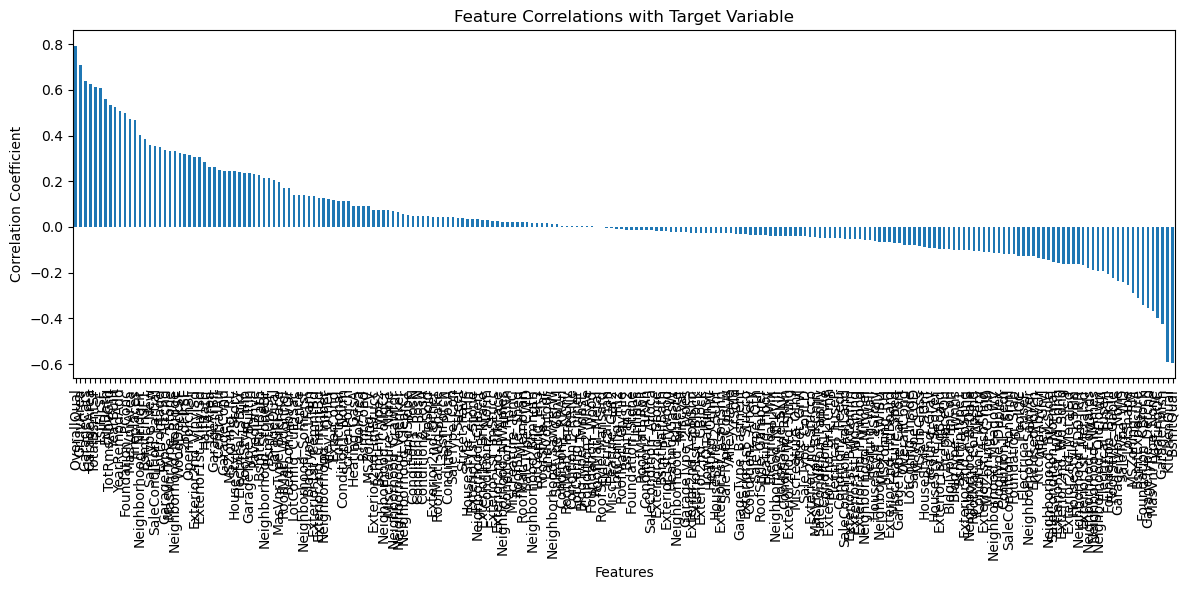

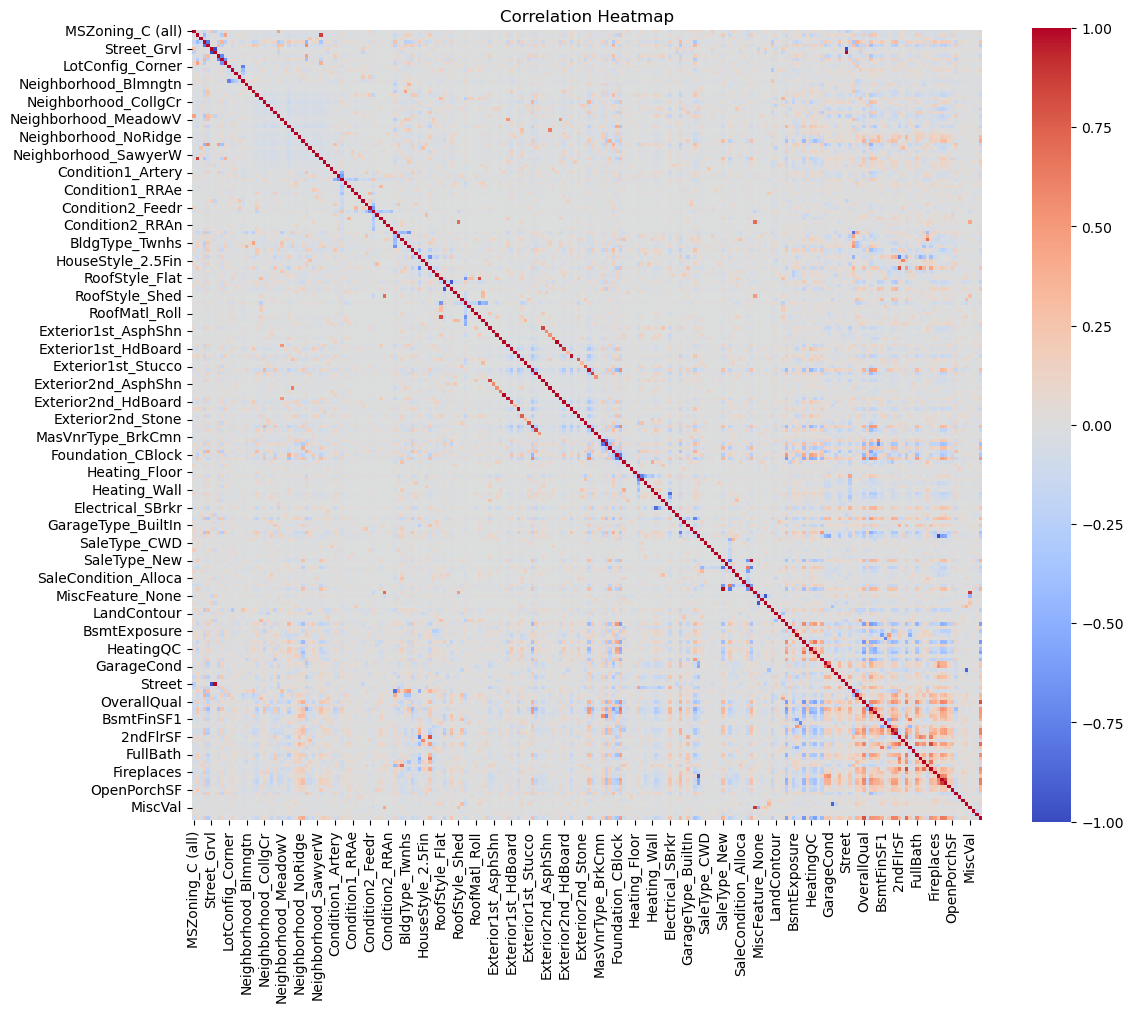

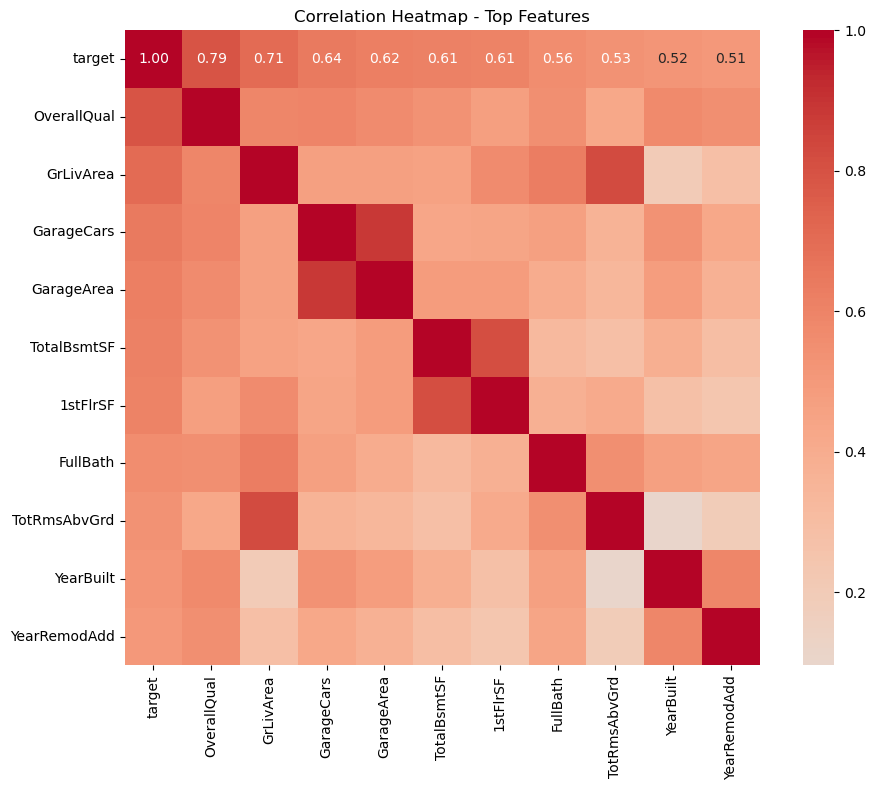

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data ready
# scaled_train_data is a pandas DataFrame containing the scaled features
# y is a pandas Series or numpy array containing the target variable

# If y is not a part of the DataFrame, let's add it
scaled_train_data['target'] = y

# Calculate the correlation matrix
correlation_matrix = scaled_train_data.corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix['target'].sort_values(ascending=False)

# Display the top 10 positively and negatively correlated features
print("Top 10 Positively Correlated Features:")
print(target_correlations[1:11])  # Exclude the perfect correlation with itself
print("\nTop 10 Negatively Correlated Features:")
print(target_correlations[:-11:-1])  # Last 10 in reverse order

# Create a bar plot for feature correlations
plt.figure(figsize=(12, 6))
target_correlations[1:-1].plot(kind='bar')  # Exclude the target itself
plt.title('Feature Correlations with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Create a heatmap for all correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# If you want to focus on the most correlated features in the heatmap
top_features = list(target_correlations[:11].index)  # Top 10 + target itself
top_features_matrix = correlation_matrix.loc[top_features, top_features]

plt.figure(figsize=(10, 8))
sns.heatmap(top_features_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap - Top Features')
plt.tight_layout()
plt.show()

# Remove the target variable from the DataFrame to avoid using it as a feature
scaled_train_data.drop('target', axis=1, inplace=True)

## Model

In [28]:
# x_train: input features
# y: target variable
x_train = scaled_train_data
x_test = scaled_test_data

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

# Assuming x_train and y are your training data and target variable, respectively

# Apply logarithm to the target variable
log_y = np.log(y)

# Select the top 10 features based on correlation with the target
selector = SelectKBest(score_func=f_regression, k=138)
x_train_selected = selector.fit_transform(x_train, log_y)

# Create a linear regression object
model = LinearRegression()

# Use cross_val_predict to get predicted values for each fold
log_y_pred = cross_val_predict(model, x_train_selected, log_y, cv=5)

# Calculate RMSE between log(predicted) and log(observed) for each fold
rmse_scores = []
for i in range(5):
    # Create indices for each fold
    test_indices = [j for j in range(len(x_train_selected)) if j % 5 == i]
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(log_y[test_indices], log_y_pred[test_indices]))
    rmse_scores.append(rmse)

# Print the RMSE scores for each fold
print("RMSE scores for each fold:")
for i, score in enumerate(rmse_scores):
    print(f"Fold {i+1}: {score:.4f}")

# Print the mean and standard deviation of RMSE scores
print(f"\nMean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard deviation of RMSE: {np.std(rmse_scores):.4f}")

# Train the model on the entire dataset for future predictions
model.fit(x_train_selected, log_y)

# For future predictions, you would do:
# x_new_selected = selector.transform(x_new)
# log_y_new_pred = model.predict(x_new_selected)
# y_new_pred = np.exp(log_y_new_pred)

In [ ]:
# Assuming x_train is your original training data DataFrame
# and y is your target variable

# Create and fit the selector
selector = SelectKBest(score_func=f_regression, k=138)  # Use 150 since you were testing up to 150 features
selector.fit(x_train, log_y)

# Get the indices of the selected features in order of importance
selected_indices = selector.get_support(indices=True)

# Get the name of the problematic feature
problematic_feature_index = 137
original_index = selected_indices[problematic_feature_index]
problematic_feature_name = x_train.columns[original_index]

print(f"Problematic feature name: {problematic_feature_name}")
print(f"Original index in x_train: {original_index}")

# You can also get all selected feature names in order of importance
selected_feature_names = x_train.columns[selected_indices]
print("\nAll selected feature names in order of importance:")
for i, feature_name in enumerate(selected_feature_names):
    print(f"{i+1}: {feature_name}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your original training data is stored in a DataFrame called 'x_train'
# and the problematic feature name is stored in 'problematic_feature_name'

# Get the values of the problematic feature
feature_values = x_train[problematic_feature_name]

# Plot the distribution of the feature
plt.figure(figsize=(8, 6))
plt.hist(feature_values, bins=30, edgecolor='black')
plt.xlabel(problematic_feature_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {problematic_feature_name}')
plt.show()

# Calculate summary statistics
print(f"\nSummary statistics for {problematic_feature_name}:")
print(feature_values.describe())

# Check for outliers using the Z-score method
z_scores = np.abs(stats.zscore(feature_values))
threshold = 3
outliers = feature_values[z_scores > threshold]
print(f"\nNumber of outliers (Z-score > {threshold}): {len(outliers)}")

# Plot the relationship between the problematic feature and the target variable
plt.figure(figsize=(8, 6))
plt.scatter(feature_values, y)
plt.xlabel(problematic_feature_name)
plt.ylabel('Target Variable')
plt.title(f'Relationship between {problematic_feature_name} and Target Variable')
plt.show()

# Plot the relationship between the problematic feature and the logarithm of the target variable
plt.figure(figsize=(8, 6))
plt.scatter(feature_values, np.log(y))
plt.xlabel(problematic_feature_name)
plt.ylabel('Log of Target Variable')
plt.title(f'Relationship between {problematic_feature_name} and Log of Target Variable')
plt.show()

#### Multilayer Perceptron

In [75]:
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Create an MLP regressor
mlp = MLPRegressor(
    max_iter=500,
    hidden_layer_sizes=(100, 100),
    batch_size=32,
    alpha=0.1,
    solver='adam',
    learning_rate='invscaling',
    activation='relu',
    learning_rate_init=0.1,
    power_t=0.5,
    random_state=42
)

# Define a custom scoring function for cross-validation
def log_rmse_scorer(y_true, y_pred):
    log_true = np.log(y_true)
    log_pred = np.log(y_pred)
    return -np.sqrt(mean_squared_error(log_true, log_pred))

# Create a scorer using the custom scoring function
scorer = make_scorer(log_rmse_scorer, greater_is_better=False)

# Define the range of K values to test
k_values = range(100, 200, 20)

# Perform cross-validation for each value of K
cv_scores = []
for k in k_values:
    # Select the top k features using SelectKBest
    
    selector = SelectKBest(score_func=f_regression, k=k)
    x_train_selected = selector.fit_transform(x_train, y)

    # Perform 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(mlp, x_train_selected, y, cv=kf, scoring=scorer, n_jobs=-1)

    # Convert scores back to positive RMSE values
    rmse_scores = -scores
    cv_scores.append(np.mean(rmse_scores))

# Find the best value of K
best_k = k_values[np.argmin(cv_scores)]
print("Best value of K:", best_k)

# Train the final model with the best value of K
selector = SelectKBest(score_func=f_regression, k=best_k)
x_train_selected = selector.fit_transform(x_train, y)
mlp.fit(x_train_selected, y)

Best value of K: 180


MLPRegressor(alpha=0.1, batch_size=32, hidden_layer_sizes=(100, 100),
             learning_rate='invscaling', learning_rate_init=0.1, max_iter=500,
             random_state=42)

In [76]:
# Train the final model with the best value of K
selector = SelectKBest(score_func=f_regression, k=best_k)
x_train_selected = selector.fit_transform(x_train, y)
mlp.fit(x_train_selected, y)

MLPRegressor(alpha=0.1, batch_size=32, hidden_layer_sizes=(100, 100),
             learning_rate='invscaling', learning_rate_init=0.1, max_iter=500,
             random_state=42)

In [78]:
# Predict values for the test data
x_test_selected = selector.transform(x_test)
y_pred = mlp.predict(x_test_selected)

#### KNN Regression

In [117]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Custom scorer for RMSE of log(predictions) vs log(targets)
def log_rmse_scorer(y_true, y_pred):
    log_y_true = np.log(y_true)
    log_y_pred = np.log(y_pred)
    rmse = np.sqrt(np.mean((log_y_true - log_y_pred) ** 2))
    return -rmse  # Negate the RMSE so that higher (less negative) is better

log_rmse_scorer = make_scorer(log_rmse_scorer, greater_is_better=True)

# Create a pipeline for scaling, dimensionality reduction, and KNN regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

# Define the parameter grid for tuning
param_grid = {
    'pca__n_components': [50, 100, 150, 180, 200],  # Number of features after PCA
    'knn__n_neighbors': [3, 5, 7, 10, 15, 20, 30],  # Number of neighbors
    'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'cosine'],  # Distance metric
    'knn__weights': ['uniform', 'distance']  # Weight function
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=log_rmse_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Perform the grid search using cross-validation
grid_search.fit(x_train, y)

# Print the best parameters and score
print("Best parameters:")
for param_name in sorted(param_grid.keys()):
    print(f"{param_name}: {grid_search.best_params_[param_name]}")
print(f"\nBest cross-validation score: {-grid_search.best_score_:.4f}")

# Train the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(x_train, y)

# Get feature importance (explained variance ratio) from PCA
pca = best_model.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nCumulative explained variance ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
    if (i + 1) % 50 == 0 or (i + 1) == best_model.named_steps['pca'].n_components_:
        print(f"  {i + 1} components: {ratio:.4f}")

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Best parameters:
knn__metric: cosine
knn__n_neighbors: 30
knn__weights: distance
pca__n_components: 50

Best cross-validation score: 0.1843

Cumulative explained variance ratio:
  50 components: 0.5815


#### Decision Tree

In [172]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer

# Make sure x_train and y have the same number of samples
assert len(x_train) == len(y), "x_train and y must have the same number of samples."

# Define the range of features to try
feature_ranges = [50, 100, 150, 180, 200]

# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

best_rmse = float('inf')
best_n_features = None
best_params = None

def rmse_log(y_true, y_pred):
    """Calculate RMSE on log-transformed data."""
    y_true_log = np.log(y_true)
    y_pred_log = np.log(y_pred)
    return -np.sqrt(mean_squared_error(y_true_log, y_pred_log))

# Create a scorer function
rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)

for n_features in feature_ranges:
    print(f"\nTrying with {n_features} features...")

    # Perform feature selection using RFE
    rfe_selector = RFE(estimator=DecisionTreeRegressor(random_state=42), n_features_to_select=n_features)
    x_train_selected = rfe_selector.fit_transform(x_train, y)

    # Create a DecisionTreeRegressor
    dt_regressor = DecisionTreeRegressor(random_state=42)



    # Use this scorer in GridSearchCV
    grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring=rmse_log_scorer, n_jobs=-1)
    grid_search.fit(x_train_selected, y)

    # Get the best parameters and score
    best_params_current = grid_search.best_params_
    best_score_current = grid_search.best_score_  # Already in RMSE

    print(f"Best parameters: {best_params_current}")
    print(f"Best RMSE (log-transformed): {best_score_current:.4f}")

    # Update the overall best if current is better
    if best_score_current < best_rmse:
        best_rmse = best_score_current
        best_n_features = n_features
        best_params = best_params_current

print(f"\nOverall best configuration:")
print(f"Number of features: {best_n_features}")
print(f"Best parameters: {best_params}")
print(f"Best RMSE (log-transformed): {best_rmse:.4f}")

# Train the best model on all data
best_rfe = RFE(estimator=DecisionTreeRegressor(random_state=42), n_features_to_select=best_n_features)
x_train_best = best_rfe.fit_transform(x_train, y)

best_dt = DecisionTreeRegressor(random_state=42, **best_params)
best_dt.fit(x_train_best, y)

print("\nBest model has been trained on all data.")


Trying with 50 features...
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE (log-transformed): 0.2359

Trying with 100 features...
Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE (log-transformed): 0.2548

Trying with 150 features...
Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE (log-transformed): 0.2668

Trying with 180 features...
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE (log-transformed): 0.2668

Trying with 200 features...
Best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE (log-transformed): 0.2694

Overall best configuration:
Number of features: 50
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_sampl

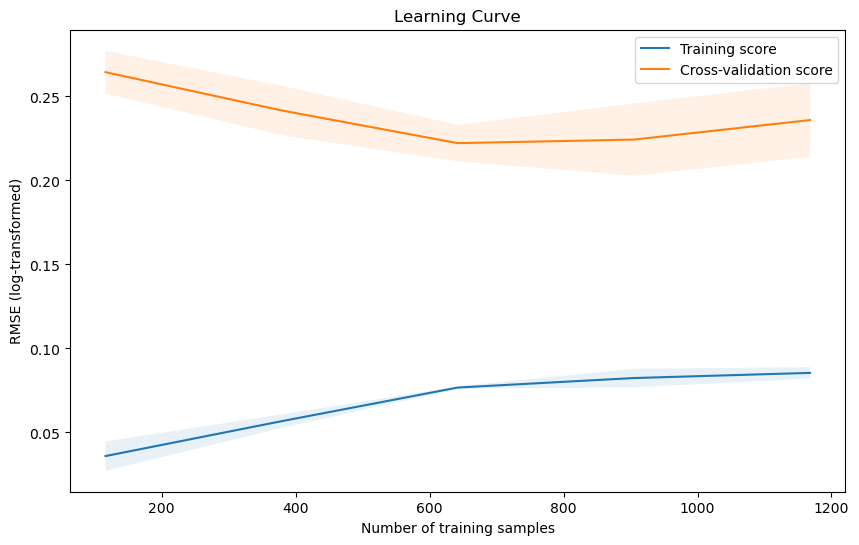

In [176]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

# Get the best model
best_dt = DecisionTreeRegressor(random_state=42, **best_params)

# Perform learning curve analysis
train_sizes, train_scores, val_scores = learning_curve(
    best_dt, x_train_best, y, cv=5, scoring=rmse_log_scorer, n_jobs=-1)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Number of training samples')
plt.ylabel('RMSE (log-transformed)')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [163]:
# Transform x_test using the same RFE selector
x_test_best = best_rfe.transform(x_test)

# Make predictions on x_test using the best model
y_pred = best_dt.predict(x_test_best)

#### SVM

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostRegressor
import numpy as np

# Define the log RMSE scorer function
def log_rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.abs(np.log1p(y_true) - np.log1p(y_pred))**2))

# Create a scorer object
log_rmse_scorer = make_scorer(log_rmse, greater_is_better=False)

# Create an SVR model for grid search
model = SVR()

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['poly'],
    'C': [100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01],
    'degree': [2, 3, 4, 5]  # only used for the 'poly' kernel
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, scoring=log_rmse_scorer, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(x_train, y)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE (log) score: %.4f" % -grid_search.best_score_)

# Get the best estimator from the grid search
best_svm = grid_search.best_estimator_

# Create an AdaBoost regressor with the best SVM as the base estimator
boosted_svm = AdaBoostRegressor(estimator=best_svm, n_estimators=50, random_state=42)

# Fit the boosted SVM model to the training data
boosted_svm.fit(x_train, y)

# Make predictions on the test set using the boosted SVM model
y_pred = boosted_svm.predict(x_test)

Best parameters:  {'C': 1000, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best RMSE (log) score: 0.1359


In [33]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(x_test)

## Predictions

In [231]:
x_test = scaled_test_data

In [232]:
best_x_test = selector.transform(x_test)
log_y_new_pred = model.predict(best_x_test)
test_predictions = np.exp(log_y_new_pred)

In [51]:
# Make predictions on the test set
# test_predictions = best_model.predict(best_x_test)
# test_predictions = test_predictions.flatten()  # Convert to 1D array

# Create a DataFrame with the test IDs and predicted SalePrice
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)